Agnieszka Dutka
# MOWNIT, Laboratorium 5

## Zad 2 - Picture Compression

### useful imports

In [248]:
import os
from skimage.color import rgb2gray 
from skimage import data # for camera example
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


### Dictionary of sample images

In [244]:
def load_img(filename):
    im = Image.open(filename)
    matrix = np.array(im)
    matrix = rgb2gray(matrix)
    return matrix

samples_dir = "samples/"
gray_imgs = {
    "camera":data.camera(),
    "bridge":load_img(f"{samples_dir}5.2.10.tiff"), # 512
#     "couple":load_img(f"{samples_dir}5.2.08.tiff"), # 512
    "bubbles":load_img(f"{samples_dir}1.2.13.tiff"), # 512
    "res_chart_sm":load_img(f"{samples_dir}5.1.13.tiff"), # 256
    "male_lg":load_img(f"{samples_dir}5.3.01.tiff") # 1024
}

In [245]:
from time import perf_counter
def time_eval(fun, args, count=1, prnt=True):
    startt=perf_counter()
    for i in range(count):
        fun(*args)
    endt = perf_counter()
    avg = (endt-startt)/count
    if prnt:
        print(f"avg time for {args[1]}:\t{avg}")
    else:
        return avg

### Compression function

#### low rank approximation formula
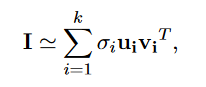

In [246]:
from matplotlib.pyplot import imshow
%matplotlib inline

def low_rank_approx(U, S, V, k):
    Uvcts = np.matrix(U[:, :k])  # first k-t singular vectors
    Svals = np.diag(S[:k])       # k first singular values
    Vvcts = np.matrix(V[:k, :])  # transposed k-th vct = k-th column
    return Uvcts * Svals * Vvcts

def get_ks(first):
    ks = [first]
    i = 0
    while ks[i]>=32:
        ks.append(ks[i]//2)
        i += 1
    return ks

def compress(matrix, name, show=False, out_folder="results"):
    sh = matrix.shape
    assert len(sh)==2 and sh[0]==sh[1], "picture must be square and in grayscale ;("
    images = []
    U, S, V = np.linalg.svd(matrix) # singular value decomposition
    
    ks = get_ks(sh[0])
    for k in ks:
        approx_matrix = low_rank_approx(U,S,V, k)
        compressed = Image.fromarray(approx_matrix).convert("RGB")
        images.append(compressed)
        compressed.save(f"{out_folder}/{name}{k}.jpg")
    
    if show:
        cols = 3
        fig,axes = plt.subplots(nrows = (len(images)+cols-1)//cols, ncols = cols, figsize=(40,40))
        for i in range(len(images)):
            axes[i//cols,i%cols].imshow(images[i])
            axes[i//cols,i%cols].set_title(f"k={ks[i]}", fontsize=30)
            

### Testing compression function on sample images

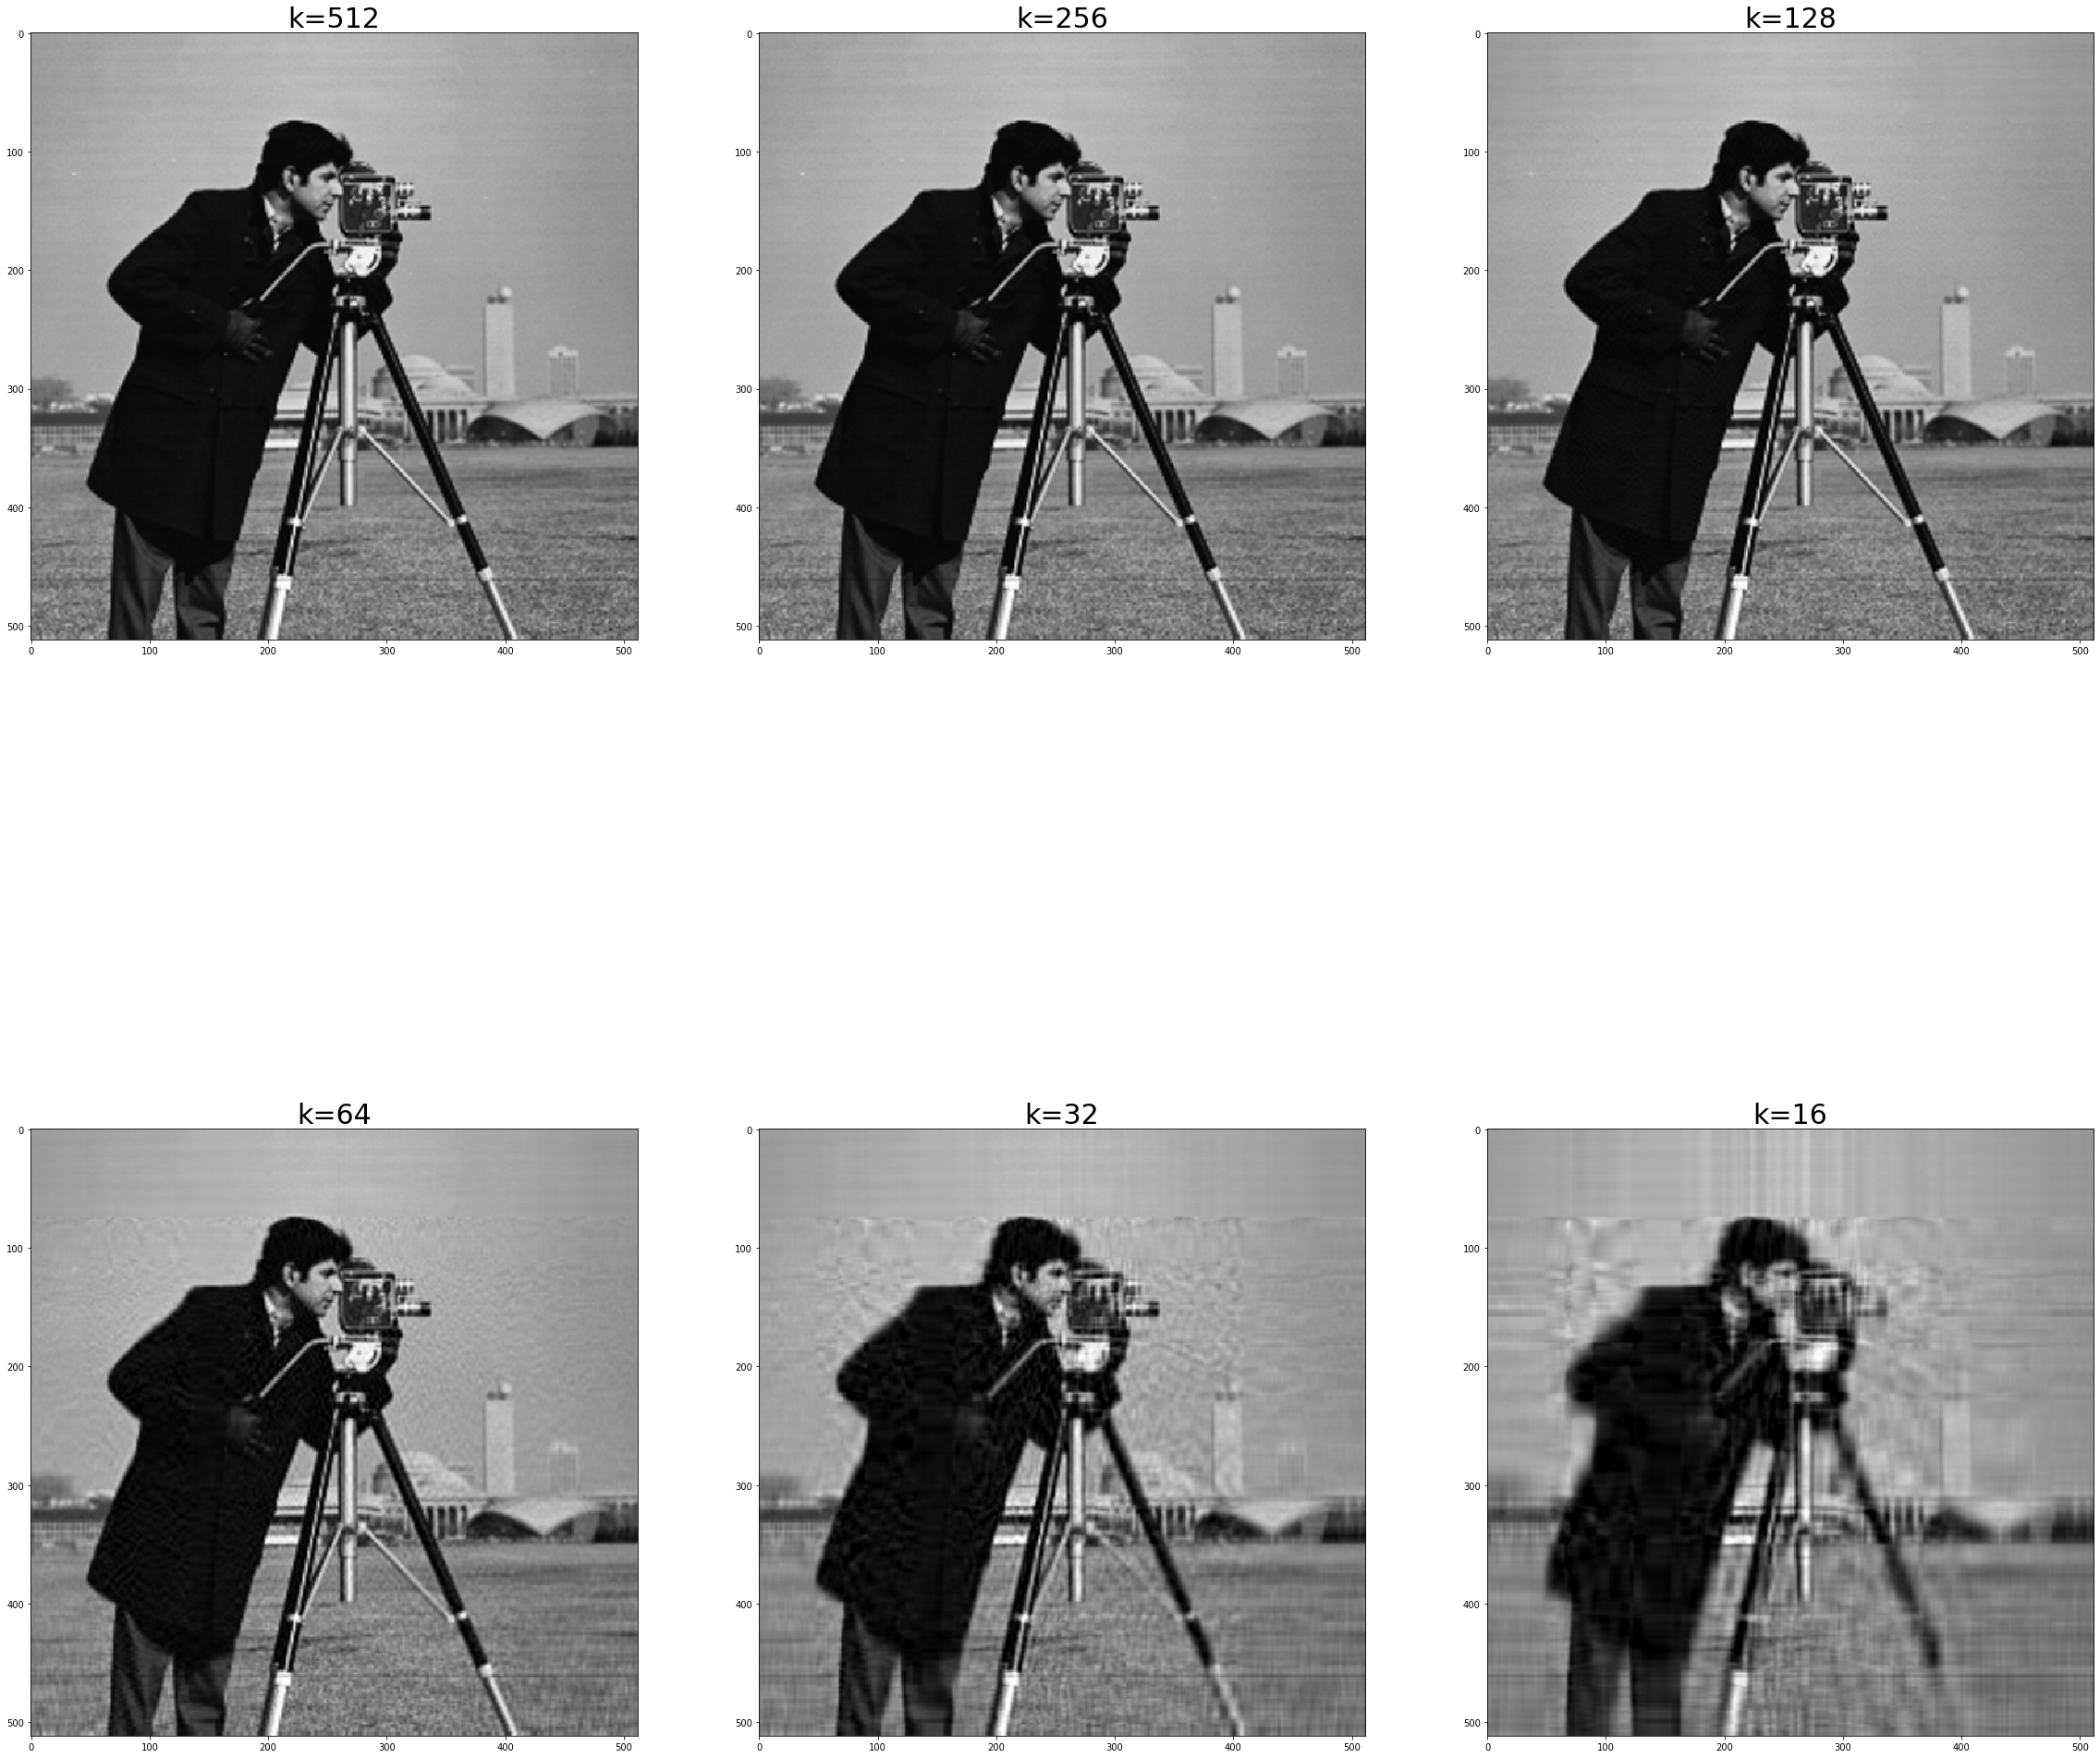

In [247]:
compress(gray_imgs["camera"], "camera", True)

### running time evaluation for sample images 

In [242]:
for key, val in gray_imgs.items():
    time_eval(compress,[val, key])

avg time for camera:	0.1369596000004094
avg time for bridge:	0.1614129999998113
avg time for bubbles:	0.16298229999847536
avg time for res_chart_sm:	0.024670099999639206
avg time for male_lg:	0.7483132000015758
